# Resolviendo un problema de regresión

In [28]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import optimizers, layers, models


In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()


In [3]:
train_data.shape


(404, 13)

In [4]:
"""
Los datos tienen una diferencia numerica entre ellos muy grande unos
396.9 y otros 0.539 , esto es por que quizas una diferencia de 100 en el sueldo no es mucho pero una diferencia de 5 en la edad es bastante

por lo cual para evitar que la red le de mayor importancia a los valores mas altos debemos Normalizar los datos
"""
print(train_data[0])
print(train_labels[0])


[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [5]:
# normalizando los datos

# les restamos la media
mean = train_data.mean(axis=0)
train_data = train_data - mean

# y dividimos entre la desviacion estandar
std = train_data.std(axis=0)
train_data = train_data / std

# de esta forma normalizamos todos los datos para que esten entre 0 y 1

"""
usamos el mismo valor de train y std de train
para test por razones eticas, yo jamas
deberia darle a la data que voy a probar informacion que
haga que se comporte diferente a la data con la que  entrene la red

por lo cual no debo normalizar con la data de test ya que se supo que al soltar la red en el mundo real esa data no la tengo por lo cual no debo entrenar como si la tuviera
"""
test_data = test_data - mean
test_data = test_data / std


In [6]:
train_data[0]


array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [7]:
test_data[0]


array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

In [33]:
def build_model_regression(lr_var, input_data):
  model = models.Sequential()

  model.add(
    layers.Dense(
      64,
      activation='relu',
      input_shape=(input_data,)
    )
  )

  model.add(
    layers.Dense(
      64,
      activation='relu'
    )
  )

  model.add(
    layers.Dense(1)
  )

  model.compile(
    optimizer=optimizers.RMSprop(
      learning_rate=lr_var,
    ),
    loss='mse',
    metrics=['mae']
  )

  return model


In [18]:
# 4 set de validacion
k = 4
num_val_samples = len(train_data) // k
num_epochs = 80
all_history = []

# Entrenamiento del modelo de regresión

In [16]:
valor = 2
(valor) * num_val_samples

202

In [34]:
all_history = []
for i in range(k):
  print(f'Fold: {i}')
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_labels[i*num_val_samples: (i+1)*num_val_samples]
  
  partial_train_data = np.concatenate(
    [
      train_data[:i*num_val_samples],
      train_data[(i+1)*num_val_samples:]
    ],
    axis=0
  )

  partial_train_targets = np.concatenate(
      [
          train_labels[:i*num_val_samples],
          train_labels[(i+1)*num_val_samples:]
      ],
      axis=0
  )

  model = build_model_regression(0.001, 13)
  history = model.fit(
    partial_train_data,
    partial_train_targets,
    epochs = num_epochs,
    batch_size=16,
    validation_data=(val_data, val_targets),
    verbose = 0
  )

  all_history.append(history.history['val_mae'])


Fold: 0
Fold: 1
Fold: 2
Fold: 3


In [35]:
len(all_history[0])

80

In [37]:
all_history

[[18.05282211303711,
  13.968994140625,
  9.23903751373291,
  5.558509826660156,
  4.403964042663574,
  3.5958962440490723,
  3.2926836013793945,
  3.250532388687134,
  2.997755527496338,
  2.79479718208313,
  2.623561143875122,
  2.591207265853882,
  2.5139975547790527,
  2.541144371032715,
  2.377243757247925,
  2.3453686237335205,
  2.333740711212158,
  2.3488237857818604,
  2.238436222076416,
  2.3441827297210693,
  2.1772780418395996,
  2.1808745861053467,
  2.0573384761810303,
  2.086881637573242,
  2.1946604251861572,
  2.139536142349243,
  2.146677255630493,
  2.2664921283721924,
  2.24456524848938,
  2.1441664695739746,
  1.9960111379623413,
  2.121722459793091,
  1.9967527389526367,
  2.2037293910980225,
  2.0590593814849854,
  2.0460407733917236,
  2.3299636840820312,
  2.039959192276001,
  2.129502773284912,
  2.097813844680786,
  1.9935344457626343,
  1.9703861474990845,
  1.9447453022003174,
  1.9872725009918213,
  2.003488302230835,
  2.1590940952301025,
  2.144802331924

In [39]:
import matplotlib.pyplot as plt

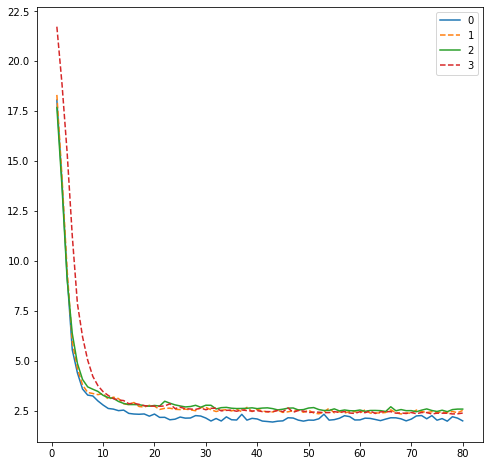

In [45]:
loss_vals = all_history[0]

fig = plt.figure(figsize=(8, 8))
epochs = range(1, len(loss_vals) + 1)
plt.plot(epochs, all_history[0], '-', label=0)
plt.plot(epochs, all_history[1], '--', label=1)
plt.plot(epochs, all_history[2], '-', label=2)
plt.plot(epochs, all_history[3], '--', label=3)

plt.legend()
plt.show()
